## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Enable reload of Python modules without Kernel Restart
%load_ext autoreload
%autoreload 2

## CODE

### Load Data

In [3]:
# Working on Data Locally
csv_path = '/home/kaym/code/KayMe1/07-ML-Ops/prelectureMLops/Raw_Data'
raw_data = pd.read_csv(os.path.join(csv_path,"query_2009-01-01_2015-01-01_200k.csv"))
raw_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.2,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.8,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.6,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.8,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.4,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1


### Data First Look

In [4]:
# Column Names to List
column_names = raw_data.columns.tolist()
column_names

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [5]:
def explore_dataframe(df):
    # Create a summary DataFrame with Exploration Results
    summary_df = pd.DataFrame({
        'column_name': df.columns,                 # Column names
        'dtype': df.dtypes,                        # Data types
        'count': [df[col].count() for col in df.columns],  # Count of Valid Values
        'n_unique': df.nunique(),                  # Number of unique values
        'n_missing': df.isna().sum(),              # Number of missing values (NaNs)
        'n_zeros': [(df[col] == 0).sum() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],  # Number of zeros (for numeric columns)
        'min': [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],  # Min value (numeric columns only)
        'max': [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],  # Max value (numeric columns only)
        'mean': [df[col].mean() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns]  # Mean (numeric columns only)
    })

    return summary_df

# Example usage with your DataFrame
summary_df = explore_dataframe(raw_data)

In [6]:
summary_df.reset_index(drop=True,inplace=True)
summary_df

,column_name,dtype,count,n_unique,n_missing,n_zeros,min,max,mean
0,fare_amount,float64,90743,836,0,0.0,-2.500000,208.000000,11.184033
1,pickup_datetime,object,90743,89904,0,NaN,NaN,NaN,NaN
2,pickup_longitude,float64,90743,46262,0,1702.0,-736.583333,169.972765,-72.515382
3,pickup_latitude,float64,90743,51502,0,1695.0,-74.009777,1963.515858,39.943378
4,dropoff_longitude,float64,90743,48779,0,1699.0,-1749.704532,169.972765,-72.532666
5,dropoff_latitude,float64,90743,54205,0,1696.0,-74.015157,1963.515858,39.941231
6,passenger_count,int64,90743,7,0,320.0,0.000000,6.000000,1.683149


--> No Missing Values To Clean / No Duplicates in Column Names

### Inspecting Features

In [7]:
raw_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000,90743.000000
mean,11.184033,-72.515382,39.943378,-72.532666,39.941231,1.683149
std,9.550824,10.696278,8.880565,12.055413,8.878703,1.303741
min,-2.500000,-736.583333,-74.009777,-1749.704532,-74.015157,0.000000
25%,6.000000,-73.992067,40.735081,-73.991378,40.734218,1.000000
50%,8.500000,-73.981852,40.752687,-73.980203,40.753308,1.000000
75%,12.500000,-73.967212,40.767072,-73.963797,40.767990,2.000000
max,208.000000,169.972765,1963.515858,169.972765,1963.515858,6.000000


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90743 entries, 0 to 90742
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        90743 non-null  float64
 1   pickup_datetime    90743 non-null  object 
 2   pickup_longitude   90743 non-null  float64
 3   pickup_latitude    90743 non-null  float64
 4   dropoff_longitude  90743 non-null  float64
 5   dropoff_latitude   90743 non-null  float64
 6   passenger_count    90743 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 4.8+ MB


In [9]:
# Coordinate Columns to exclude from distribution
coordinate_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# defining numeric columns ( with exclusion )
numeric_columns = [col for col in raw_data.select_dtypes(exclude=["object"]).columns if col not in coordinate_columns]
numeric_columns

['fare_amount', 'passenger_count']

----- Distribution of fare_amount : -----


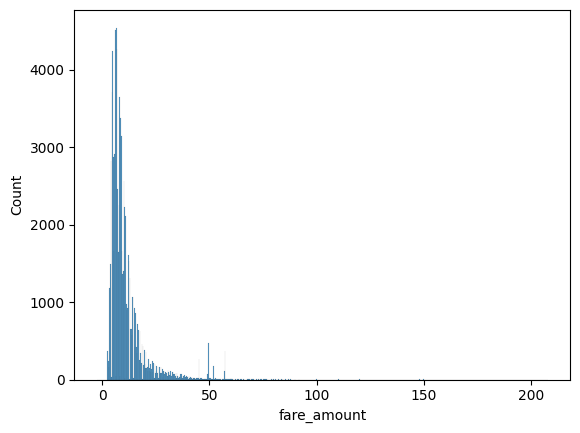

----- Distribution of passenger_count : -----


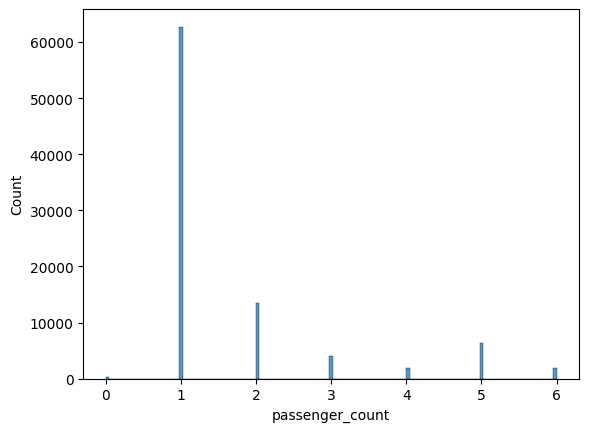

In [11]:
# Plot distribution for the numerical features  available in the dataset
for variable in numeric_columns:
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(raw_data[variable])
    plt.show()

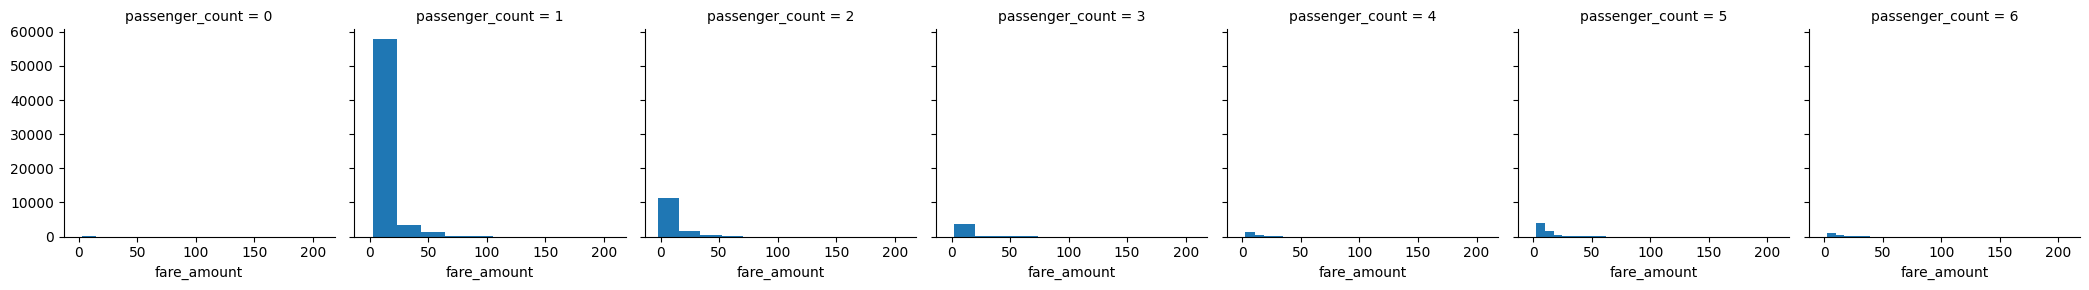

In [13]:
# FacetGrid of histograms for each passenger_count vs. fare_amount
g = sns.FacetGrid(data=raw_data, col="passenger_count")
g.map(plt.hist, "fare_amount")

Kernel Density Estimate (KDE) Interpretation : 
- Peaks in the KDE plot represent areas where the data is concentrated (where values occur more frequently).
- The area under the KDE curve represents the total probability, which sums to 1, similar to a histogram's total bar height.
- It’s useful for understanding the distribution of continuous data and is smoother than a histogram.

----- Distribution of fare_amount : -----


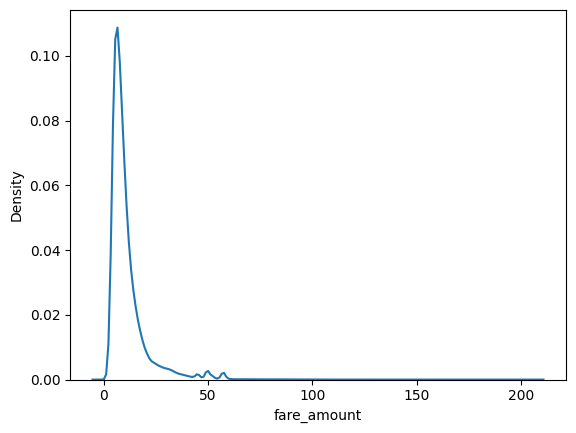

----- Distribution of pickup_longitude : -----


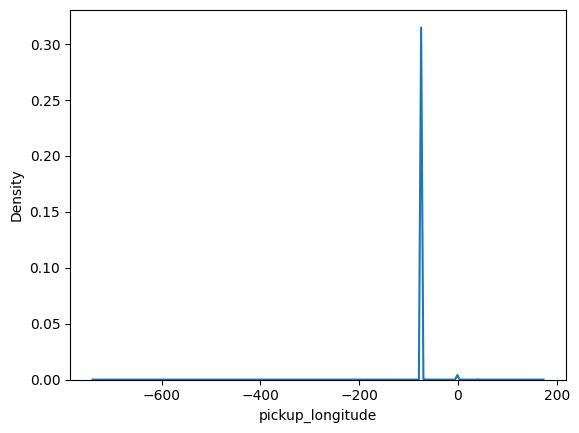

----- Distribution of pickup_latitude : -----


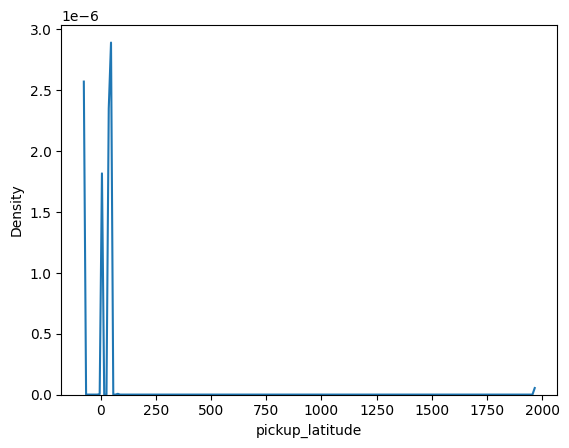

----- Distribution of dropoff_longitude : -----


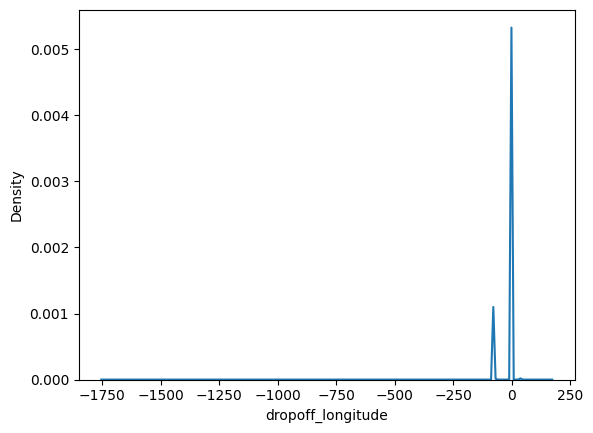

----- Distribution of dropoff_latitude : -----


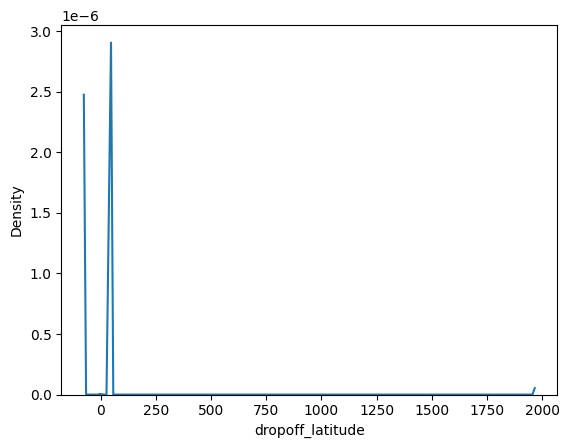

----- Distribution of passenger_count : -----


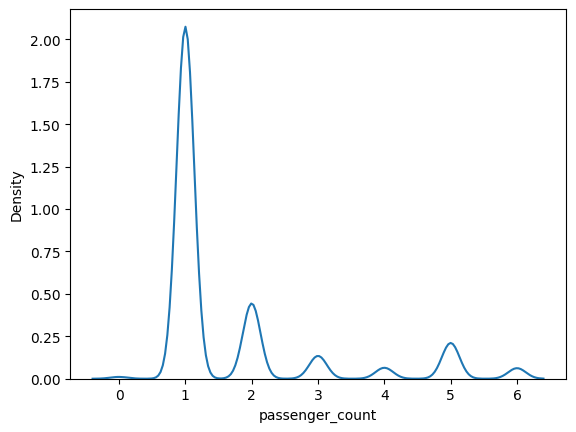

In [20]:
# Kernel Density Estimate (KDE) plot for understanding the distribution of continuous data
for variable in raw_data.select_dtypes(exclude=["object"]).columns:
    print(f"----- Distribution of {variable} : -----")
    sns.kdeplot(raw_data[variable])
    plt.show()

Heatmaps to visualize the correlation between different variables in a dataset --> Explore relationship among numeric values.
- Positive -> when one variable increases, the other one also increases
- Neutral (0) -> No correlation
- Negative -> when one variable increases, the other one decreases

<Axes: >

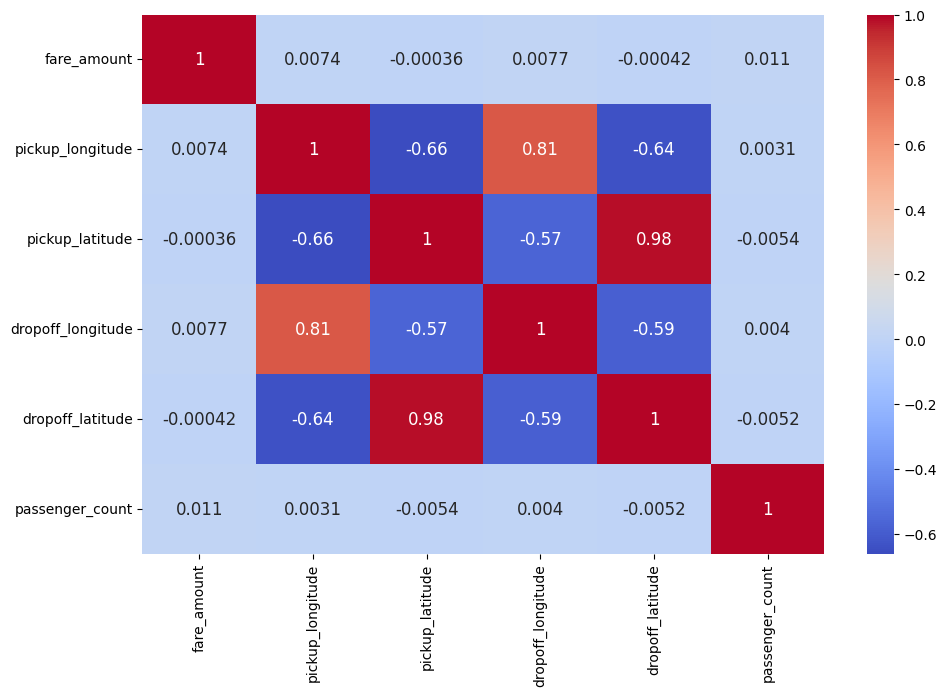

In [29]:
nodate_data = raw_data.select_dtypes(exclude=["object"])

# Correlation plot
plt.figure(figsize=(11,7))
sns.heatmap(
    nodate_data.corr(),
    cmap='coolwarm',
    annot = True,
    annot_kws={"size": 12})